# Making a Circular Classification dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
import matplotlib.pyplot as plt

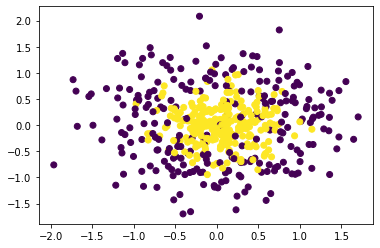

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

# Using SKLearn Adaboost Ensemble Technique

In [5]:
from sklearn.ensemble import AdaBoostClassifier

Making a object of this AdaBoostClassifier with all default parameters

AdaBoostClassifier(
    base_estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)

In [6]:
abc = AdaBoostClassifier()

Let us see its default accuracy

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
np.mean(cross_val_score(abc, X,y, scoring= 'accuracy', cv = 10))

0.786

In [9]:
abc.fit(X,y)

AdaBoostClassifier()

Let us see the plot of the decision boundary made by this algorithm

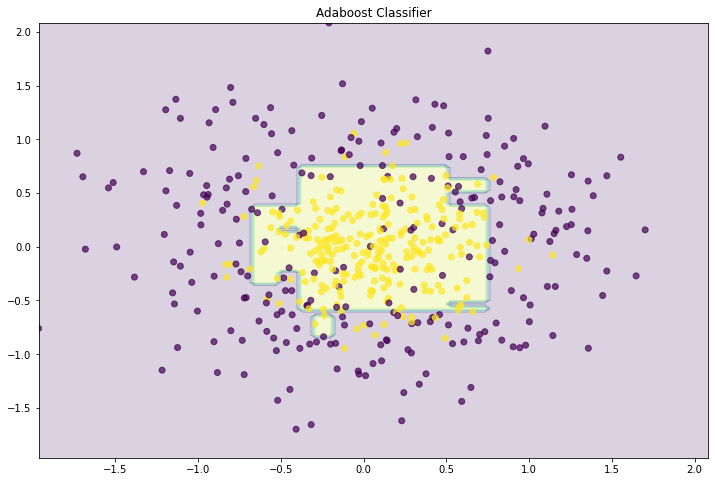

In [10]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

Let us see the affect of hyperparameters

# 1. n_estimators

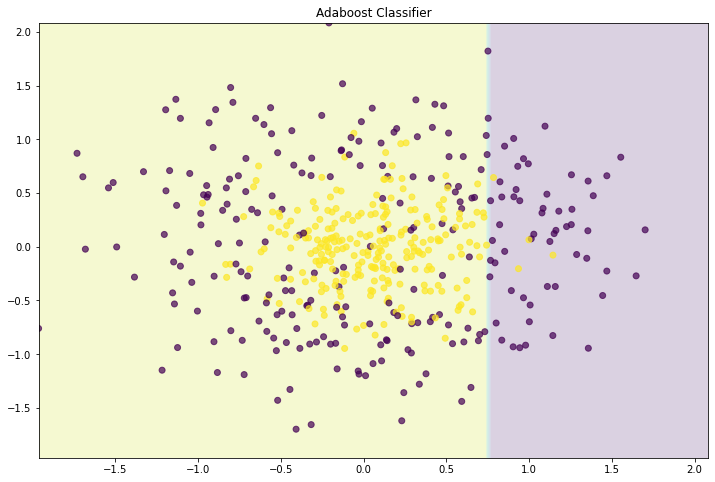

In [11]:
abc = AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

This is a clear case of underfitting, the algorithm is not even able to fit properly on the dataset

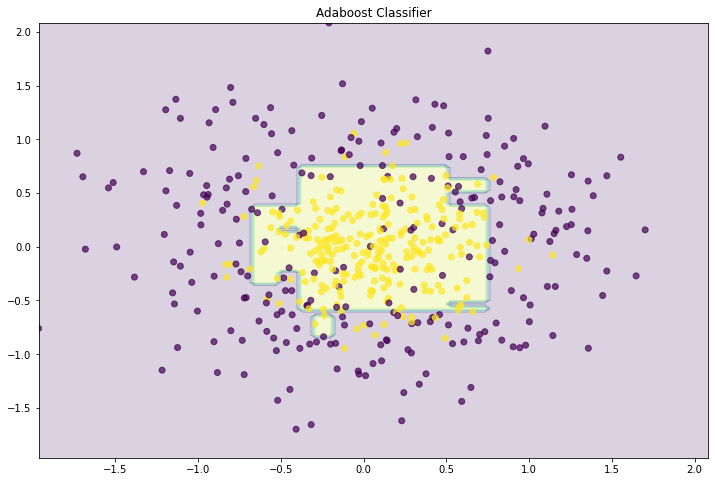

In [12]:
abc = AdaBoostClassifier(n_estimators=50)
abc.fit(X,y)
plot_decision_boundary(abc)

This looks comparatively good, as there are not any weird regions as well

But if we increase the number of estimators further, we may be getting further weird small-small regions which signifies case of overfitting

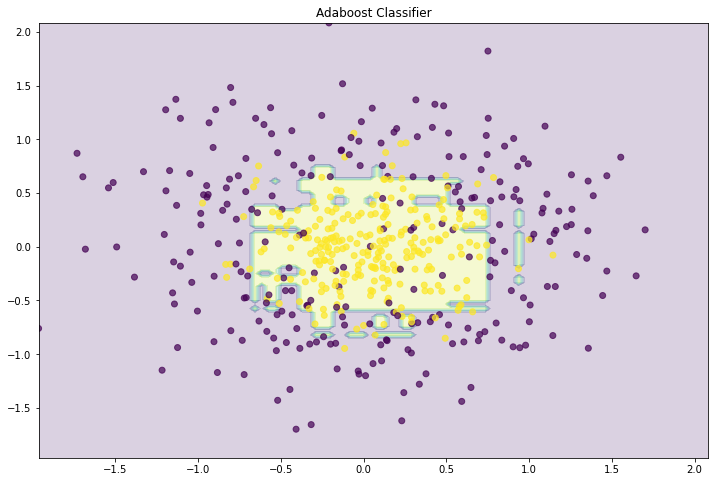

In [13]:
abc = AdaBoostClassifier(n_estimators=150)
abc.fit(X,y)
plot_decision_boundary(abc)

# 2. Learning rate 

The choice of the learning rate depends on the specific problem and dataset. 

A smaller learning rate can help prevent overfitting and produce a more robust model, but it may require more iterations to converge. 

A larger learning rate can lead to faster convergence but may make the algorithm more sensitive to noisy data.

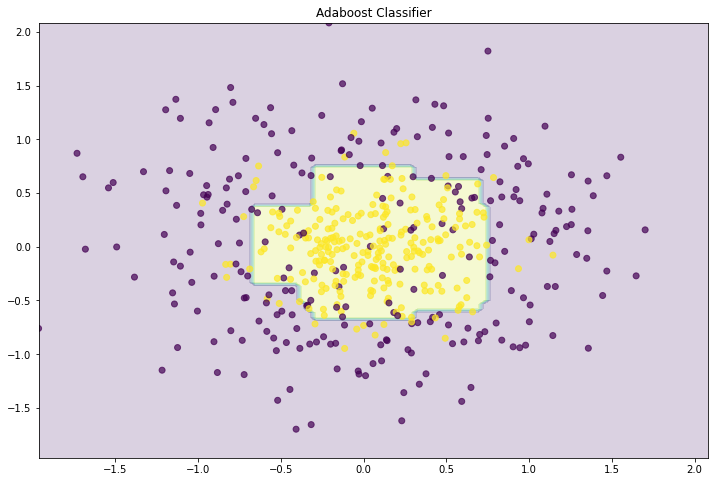

In [14]:
abc = AdaBoostClassifier(n_estimators=150, learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

So, we can see as we kept a low learning rate, chances of overfitting gets reduced

# Doing Hyper-Parameter Tuning using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'n_estimators' : [10, 50, 100, 500], 
          'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
            'algorithm' : ['SAMME', 'SAMME.R']
         }

In [17]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, 
                           n_jobs=-1, cv=10, scoring='accuracy')

Execute the grid search

In [18]:
grid_result = grid_search.fit(X, y)

Summarize the score and the best parameters

In [19]:
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
